In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = 1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## CLEANING DATA

In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### 122nd INDEX IS THE HEADER, SO REMOVE IT (DATA HAS 2 REGIONS, SO WE DIVIDE IT)

In [6]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df[["Region"]] = df[["Region"]].astype(int)  # converting float type to int

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [10]:
## dropping null vals
df = df.dropna().reset_index(drop = True)

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
# DROPPPING 122ND INDEX AS IS IT JUST HEADER NAMES
df = df.drop(122).reset_index(drop = True)

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [16]:
# FIXING SPACES IN COL NAME
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### CHANGING TYPE OF COLS FROM "OBJECT" TO INT AND FLOAT

In [17]:
col_int = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

In [18]:
df[col_int] = df[col_int].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


GENERIC METHOD TO CONVERT

In [20]:
# LIST obj CONTAINS ALL FEATURES OF TYPE OBJECT
obj = [features for features in df.columns if df[features].dtypes=="O"]
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
for i in obj:
    if i != "Classes":
        df[i] = df[i].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


SAVING CLEANED DATASET

In [23]:
df.to_csv("Algerian_forest_fires_dataset_cleaned.csv" , index = False)

# EDA

In [24]:
df_copy = df.drop(["day","month","year"], axis = 1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df_copy["Classes"].value_counts() 

# WE CAN SEE DIFF TYPE OF "FIRE", THAT'S COZ THERE ARE SPACES AFTER THE WORD, HENCE NEED TO CLEAN IT

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [26]:
# ENCODING "Classes" into 0 and 1 BUT THIS WONT WORK, COZ OF ABV ISSUE
#df_copy["Classes"] = np.where(df_copy["Classes"]=="not fire", 0, 1)

In [27]:
df_copy["Classes"].value_counts() # WE CAN SEE THE COUNTS ARE WRONG AND COMMENT ABV LINE

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [28]:
df_copy["Classes"] = np.where(df_copy["Classes"].str.contains("not fire"), 0, 1)

In [29]:
df_copy["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

C:\Users\Dev Tyagi\AppData\Local\Temp\ipykernel_4772\3564620930.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


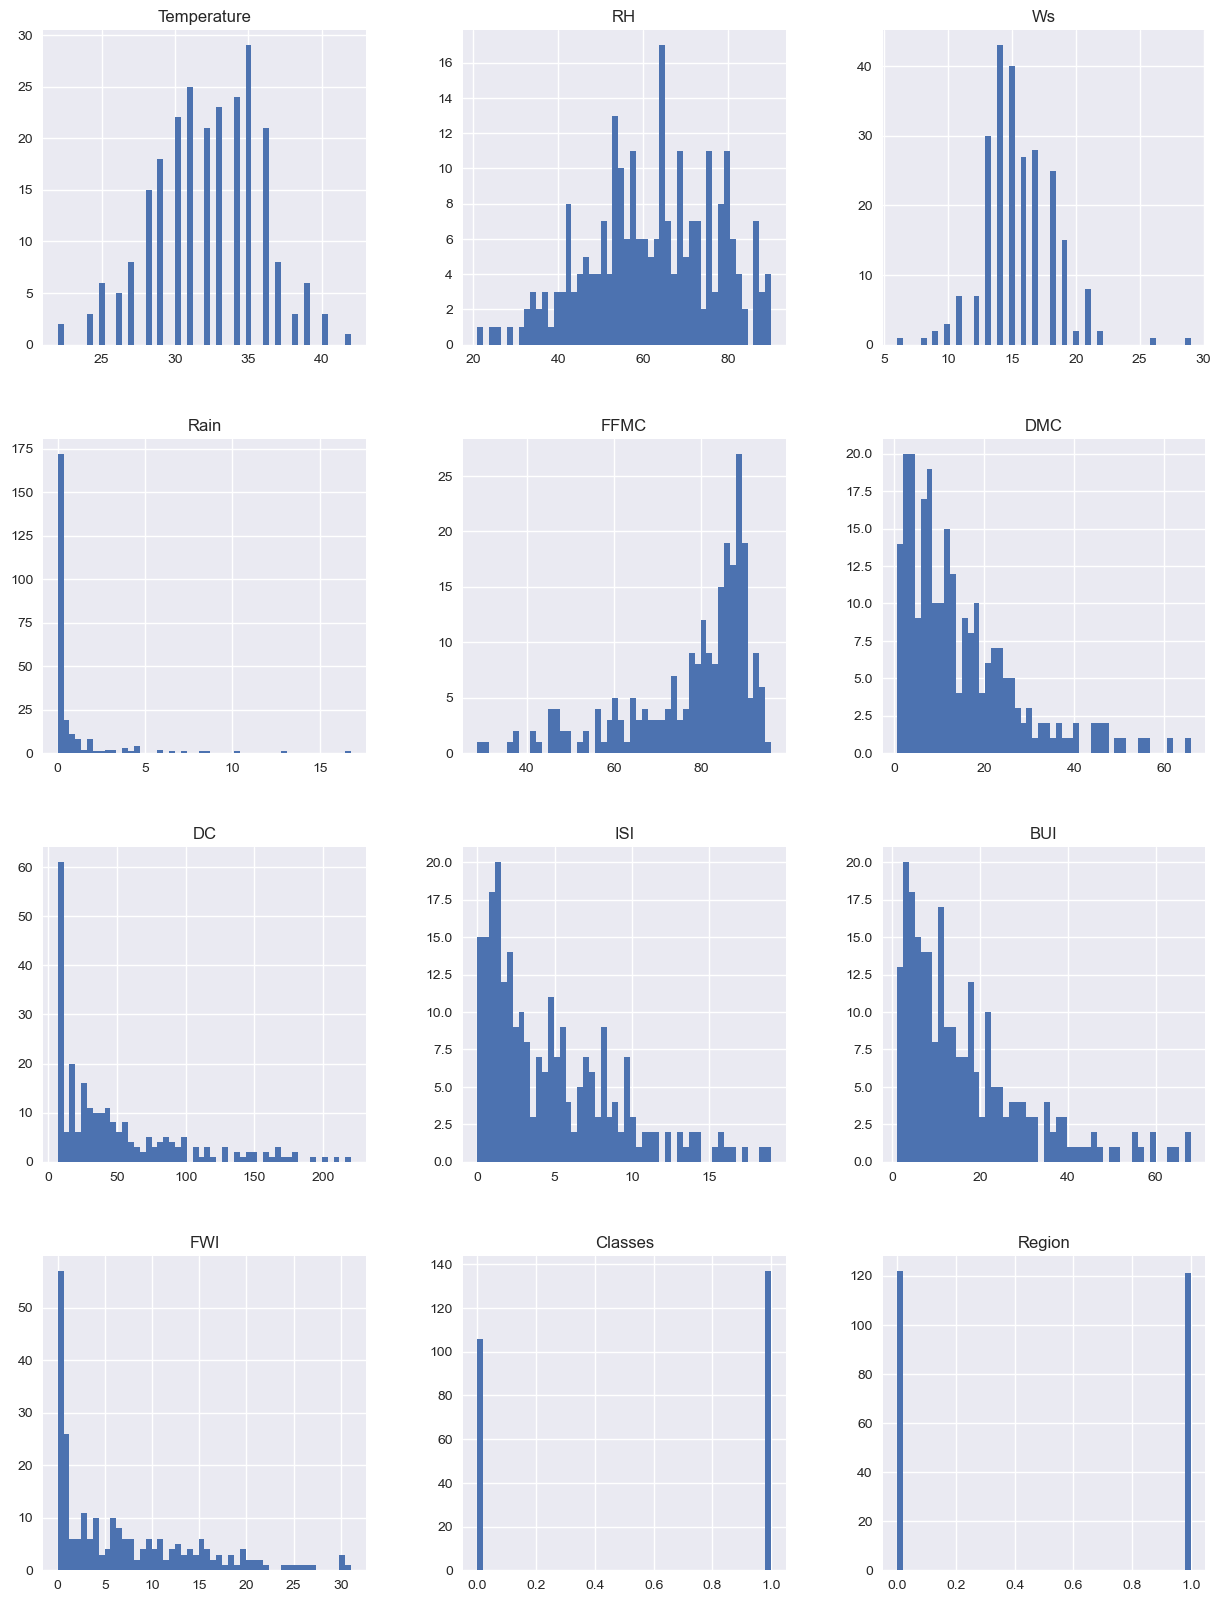

In [30]:
# PLOTTING GRAPHS FOR ALL FEATURES
plt.style.use("seaborn")
df_copy.hist(bins=50, figsize=(15,20))
plt.show()

### % USING PIE CHART

In [31]:
percent = df_copy["Classes"].value_counts(normalize= True)* 100
percent

1    56.378601
0    43.621399
Name: Classes, dtype: float64

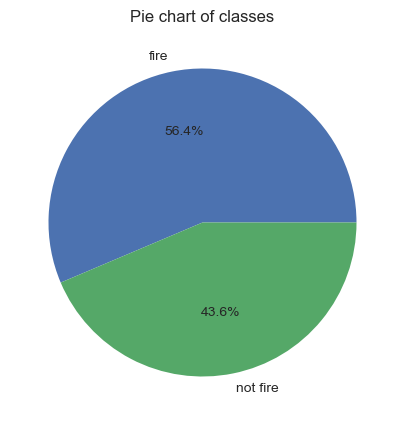

In [32]:
classlabels = ["fire" , "not fire"]
plt.figure(figsize=(10,5))
plt.pie(percent, labels = classlabels, autopct = "%1.1f%%")
plt.title("Pie chart of classes")
plt.show()

### CORRELATION

In [33]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

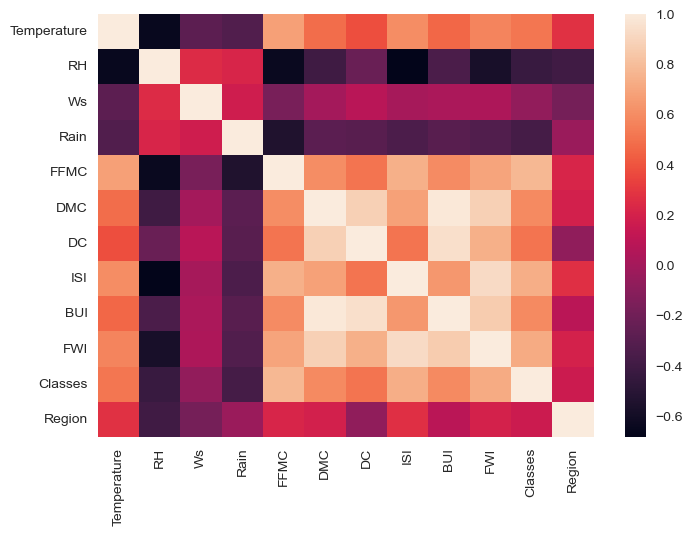

In [34]:
sns.heatmap(df_copy.corr())

In [35]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire") , "not fire", "fire")

MONTHLY FIRE ANALYSIS

Text(0.5, 1.0, 'FIRE ANALYSIS OF SIDI- BEL REGION')

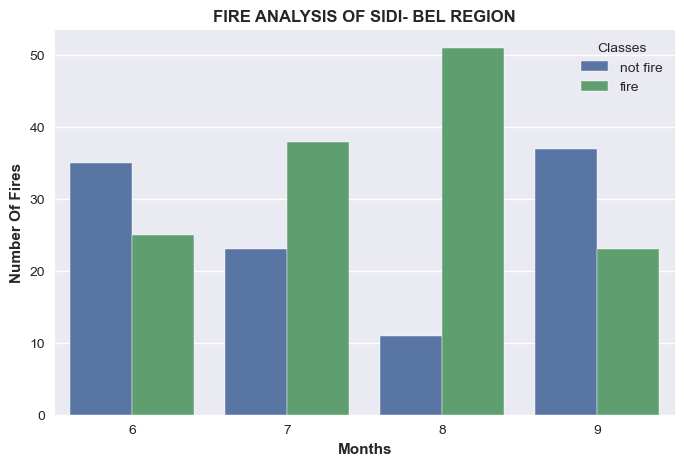

In [36]:
dftemp = df.loc[df["Region"] == 1]
plt.subplots(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x="month" , hue="Classes", data = df)
plt.xlabel("Months", weight="bold")
plt.ylabel("Number Of Fires", weight="bold")
plt.title("FIRE ANALYSIS OF SIDI- BEL REGION" , weight = "bold")

Text(0.5, 1.0, 'FIRE ANALYSIS OF BEJIAIA REGION')

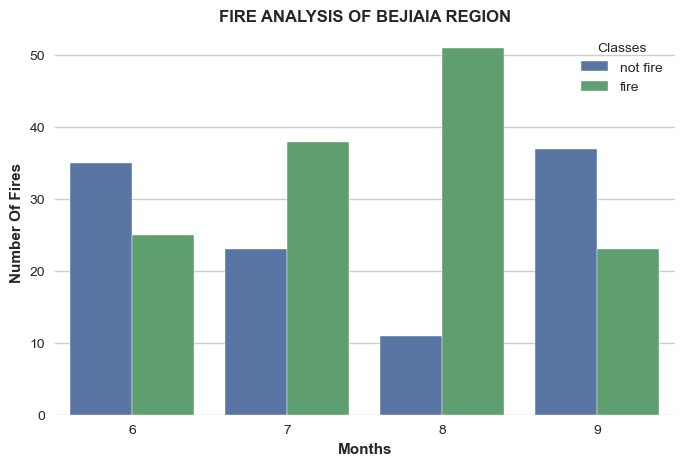

In [37]:
dftemp = df.loc[df["Region"] == 0]
plt.subplots(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x="month" , hue="Classes", data = df)
plt.xlabel("Months", weight="bold")
plt.ylabel("Number Of Fires", weight="bold")
plt.title("FIRE ANALYSIS OF BEJIAIA REGION" , weight = "bold")

### MODEL TRAINING

In [38]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
# INDEPENDENT AND DEPENDENT FEATURES

X = df_copy.drop("FWI", axis = 1)

In [40]:
y = df_copy["FWI"]

In [41]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 42)

#### FEATURE SELECTION BASED ON CORRELATION

In [43]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

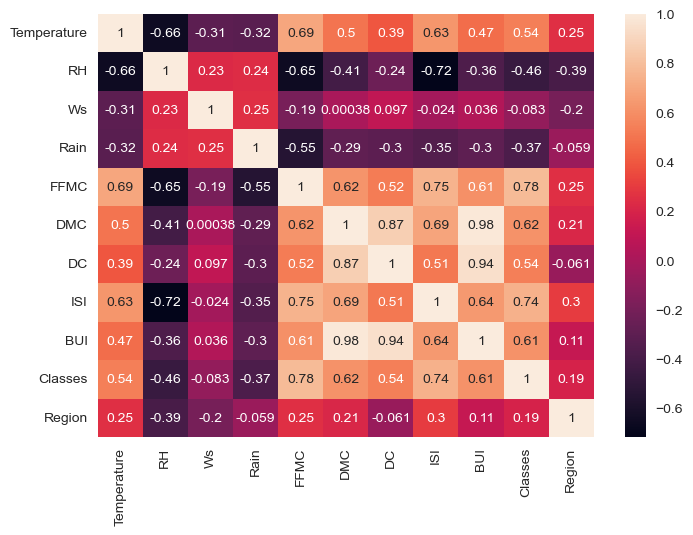

In [44]:
## CHECKING FOR MULTI COLLINEARITY
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [45]:
def correlation(dataset , threshold) :
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range (len(corr_matrix.columns)):
        for j in range(i) :
            if abs(corr_matrix.iloc[i, j]) > threshold :
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [46]:
corr_features = correlation(X_train , 0.85)   ## all cols with corr > 0.90
corr_features

{'BUI', 'DC'}

In [47]:
#drop abv features as they r highly correlated, so we dont need them

X_train.drop(corr_features , axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

#### FEATURE SCALING OR NORMALIZATION

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

BOX PLOT TO UNDERSTAND EFFECT OF STD SCALER

C:\Users\Dev Tyagi\AppData\Local\Temp\ipykernel_4772\1813568813.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After Scaling')

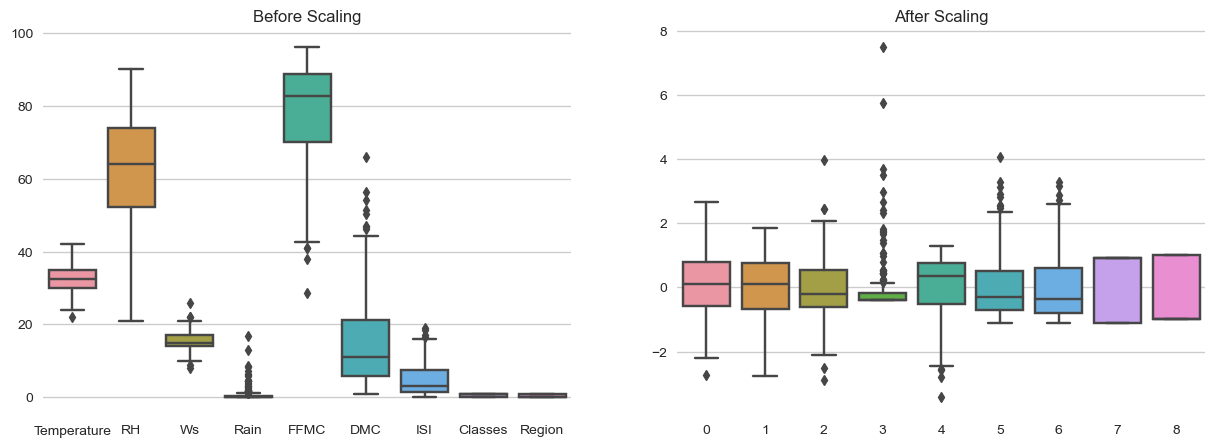

In [49]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("After Scaling")

### LINEAR REGRESSION MODEL

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 54.68236465249976
R2_SCORE : 98.39977157632893


#### LASSO REGRESSION

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 113.31759949144084
R2_SCORE : 92.64742326805691


#### LASSO CV

In [53]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)  # check how each parameter works
lassocv.fit(X_train_scaled , y_train)


LassoCV(cv=5)

In [54]:
lassocv.alphas_    # diff alphas used 

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

In [55]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 61.99701158263433
R2_SCORE : 98.0851982434192


#### RIDGE REGRESSION

In [56]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 56.42305340105693
R2_SCORE : 98.34070933284212


#### RIDGE CV

In [57]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 56.42305340105693
R2_SCORE : 98.34070933284212


In [58]:
ridgecv.alphas

(0.1, 1.0, 10.0)

#### ELASTICNET

In [59]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 188.22353634896
R2_SCORE : 78.14447243400926


#### ELASTICNET CV

In [60]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv = 5)
elastic_cv.fit(X_train_scaled, y_train)
y_pred = elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_pred , y_test)
score = r2_score(y_pred , y_test)
print("MAE :", mae*100)
print("R2_SCORE :", score*100)

MAE : 65.75946731430903
R2_SCORE : 97.99084998743879


In [61]:
elastic_cv.alpha_

0.04311146156383891

#### PICKLE THE ML MODEL , PREPOCESSING MODEL

In [62]:
import pickle

In [66]:
pickle.dump(scaler, open("scaler.pkl", "wb"))  # preprocessing model
pickle.dump(ridge , open("ridge.pkl", "wb"))   # ml model ( chosen coz best accuracy)